In [219]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
import warnings

warnings.filterwarnings('ignore')

In [155]:
titanicdata = pd.DataFrame(sns.load_dataset('titanic'))


In [156]:
titanicdata.shape

(891, 15)

In [157]:
titanicdata.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [158]:
titanicdata.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [159]:
titanicdata.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [160]:
titanicdata

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [161]:
titanicdata.describe()
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [75]:
#sns.heatmap(titanicdata.isnull(),annot= True)
#plt.show()

In [162]:
titanicdata.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

survived       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
pclass      AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
age         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
sibsp       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
parch       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fare        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
dtype: object

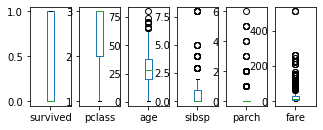

In [163]:


titanicdata.plot(kind = 'box', subplots = True, layout =(2,7))

In [164]:
#sns.pairplot(titanicdata)   # relation between the varaiables

In [166]:
#encode column
le = LabelEncoder()
titanicdata.iloc[:,2]= le.fit_transform(titanicdata.iloc[:,2].values)



titanicdata.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,1,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,1,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,1,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,0,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,0,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [177]:
#
titanicdata.dtypes

#drop the columns 

titanicdata1 = titanicdata.drop(['deck','embark_town','alone'],axis = 1)






titanicdata1 = titanicdata1.dropna(subset =['embarked'])

print(titanicdata1.head(10))
print(titanicdata1.shape)
print(titanicdata1.describe())
print(titanicdata1.info())

















#removing outliers

#from scipy.stats import zscore
#z = np.abs(zscore(titanicdata))
#z

   survived  pclass  sex   age  sibsp  parch     fare embarked   class    who  \
0         0       3    1  22.0      1      0   7.2500        S   Third    man   
1         1       1    0  38.0      1      0  71.2833        C   First  woman   
2         1       3    0  26.0      0      0   7.9250        S   Third  woman   
3         1       1    0  35.0      1      0  53.1000        S   First  woman   
4         0       3    1  35.0      0      0   8.0500        S   Third    man   
5         0       3    1   NaN      0      0   8.4583        Q   Third    man   
6         0       1    1  54.0      0      0  51.8625        S   First    man   
7         0       3    1   2.0      3      1  21.0750        S   Third  child   
8         1       3    0  27.0      0      2  11.1333        S   Third  woman   
9         1       2    0  14.0      1      0  30.0708        C  Second  child   

   adult_male alive  
0        True    no  
1       False   yes  
2       False   yes  
3       False   yes 

In [182]:
#label encoding of all non numerical to numerical
le = LabelEncoder()
titanicdata1.iloc[:,7]= le.fit_transform(titanicdata1.iloc[:,7].values)
titanicdata1.iloc[:,8]= le.fit_transform(titanicdata1.iloc[:,8].values)
titanicdata1.iloc[:,9]= le.fit_transform(titanicdata1.iloc[:,9].values)
titanicdata1.iloc[:,10]= le.fit_transform(titanicdata1.iloc[:,10].values)
titanicdata1.iloc[:,11]= le.fit_transform(titanicdata1.iloc[:,11].values)


print(titanicdata1.head(10))
print(titanicdata1.dtypes)

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   
5         0       3    1   NaN      0      0   8.4583         1      2    1   
6         0       1    1  54.0      0      0  51.8625         2      0    1   
7         0       3    1   2.0      3      1  21.0750         2      2    0   
8         1       3    0  27.0      0      2  11.1333         2      2    2   
9         1       2    0  14.0      1      0  30.0708         0      1    0   

   adult_male  alive  
0           1      0  
1           0      1  
2           0      1  
3           0      1  
4           1  

In [185]:
#impute missing values(NAN) to mean(due to data is continuous)

titanicdata1.fillna(titanicdata1.mean(), inplace=True)
# count the number of NaN values in each column
print(titanicdata1.isnull().sum())
print(titanicdata1.head(20))

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
dtype: int64
    survived  pclass  sex        age  sibsp  parch     fare  embarked  class  \
0          0       3    1  22.000000      1      0   7.2500         2      2   
1          1       1    0  38.000000      1      0  71.2833         0      0   
2          1       3    0  26.000000      0      0   7.9250         2      2   
3          1       1    0  35.000000      1      0  53.1000         2      0   
4          0       3    1  35.000000      0      0   8.0500         2      2   
5          0       3    1  29.642093      0      0   8.4583         1      2   
6          0       1    1  54.000000      0      0  51.8625         2      0   
7          0       3    1   2.000000      3      1  21.0750         2      2   
8          1       3    0  27.000000      0      2  11.1333         2      

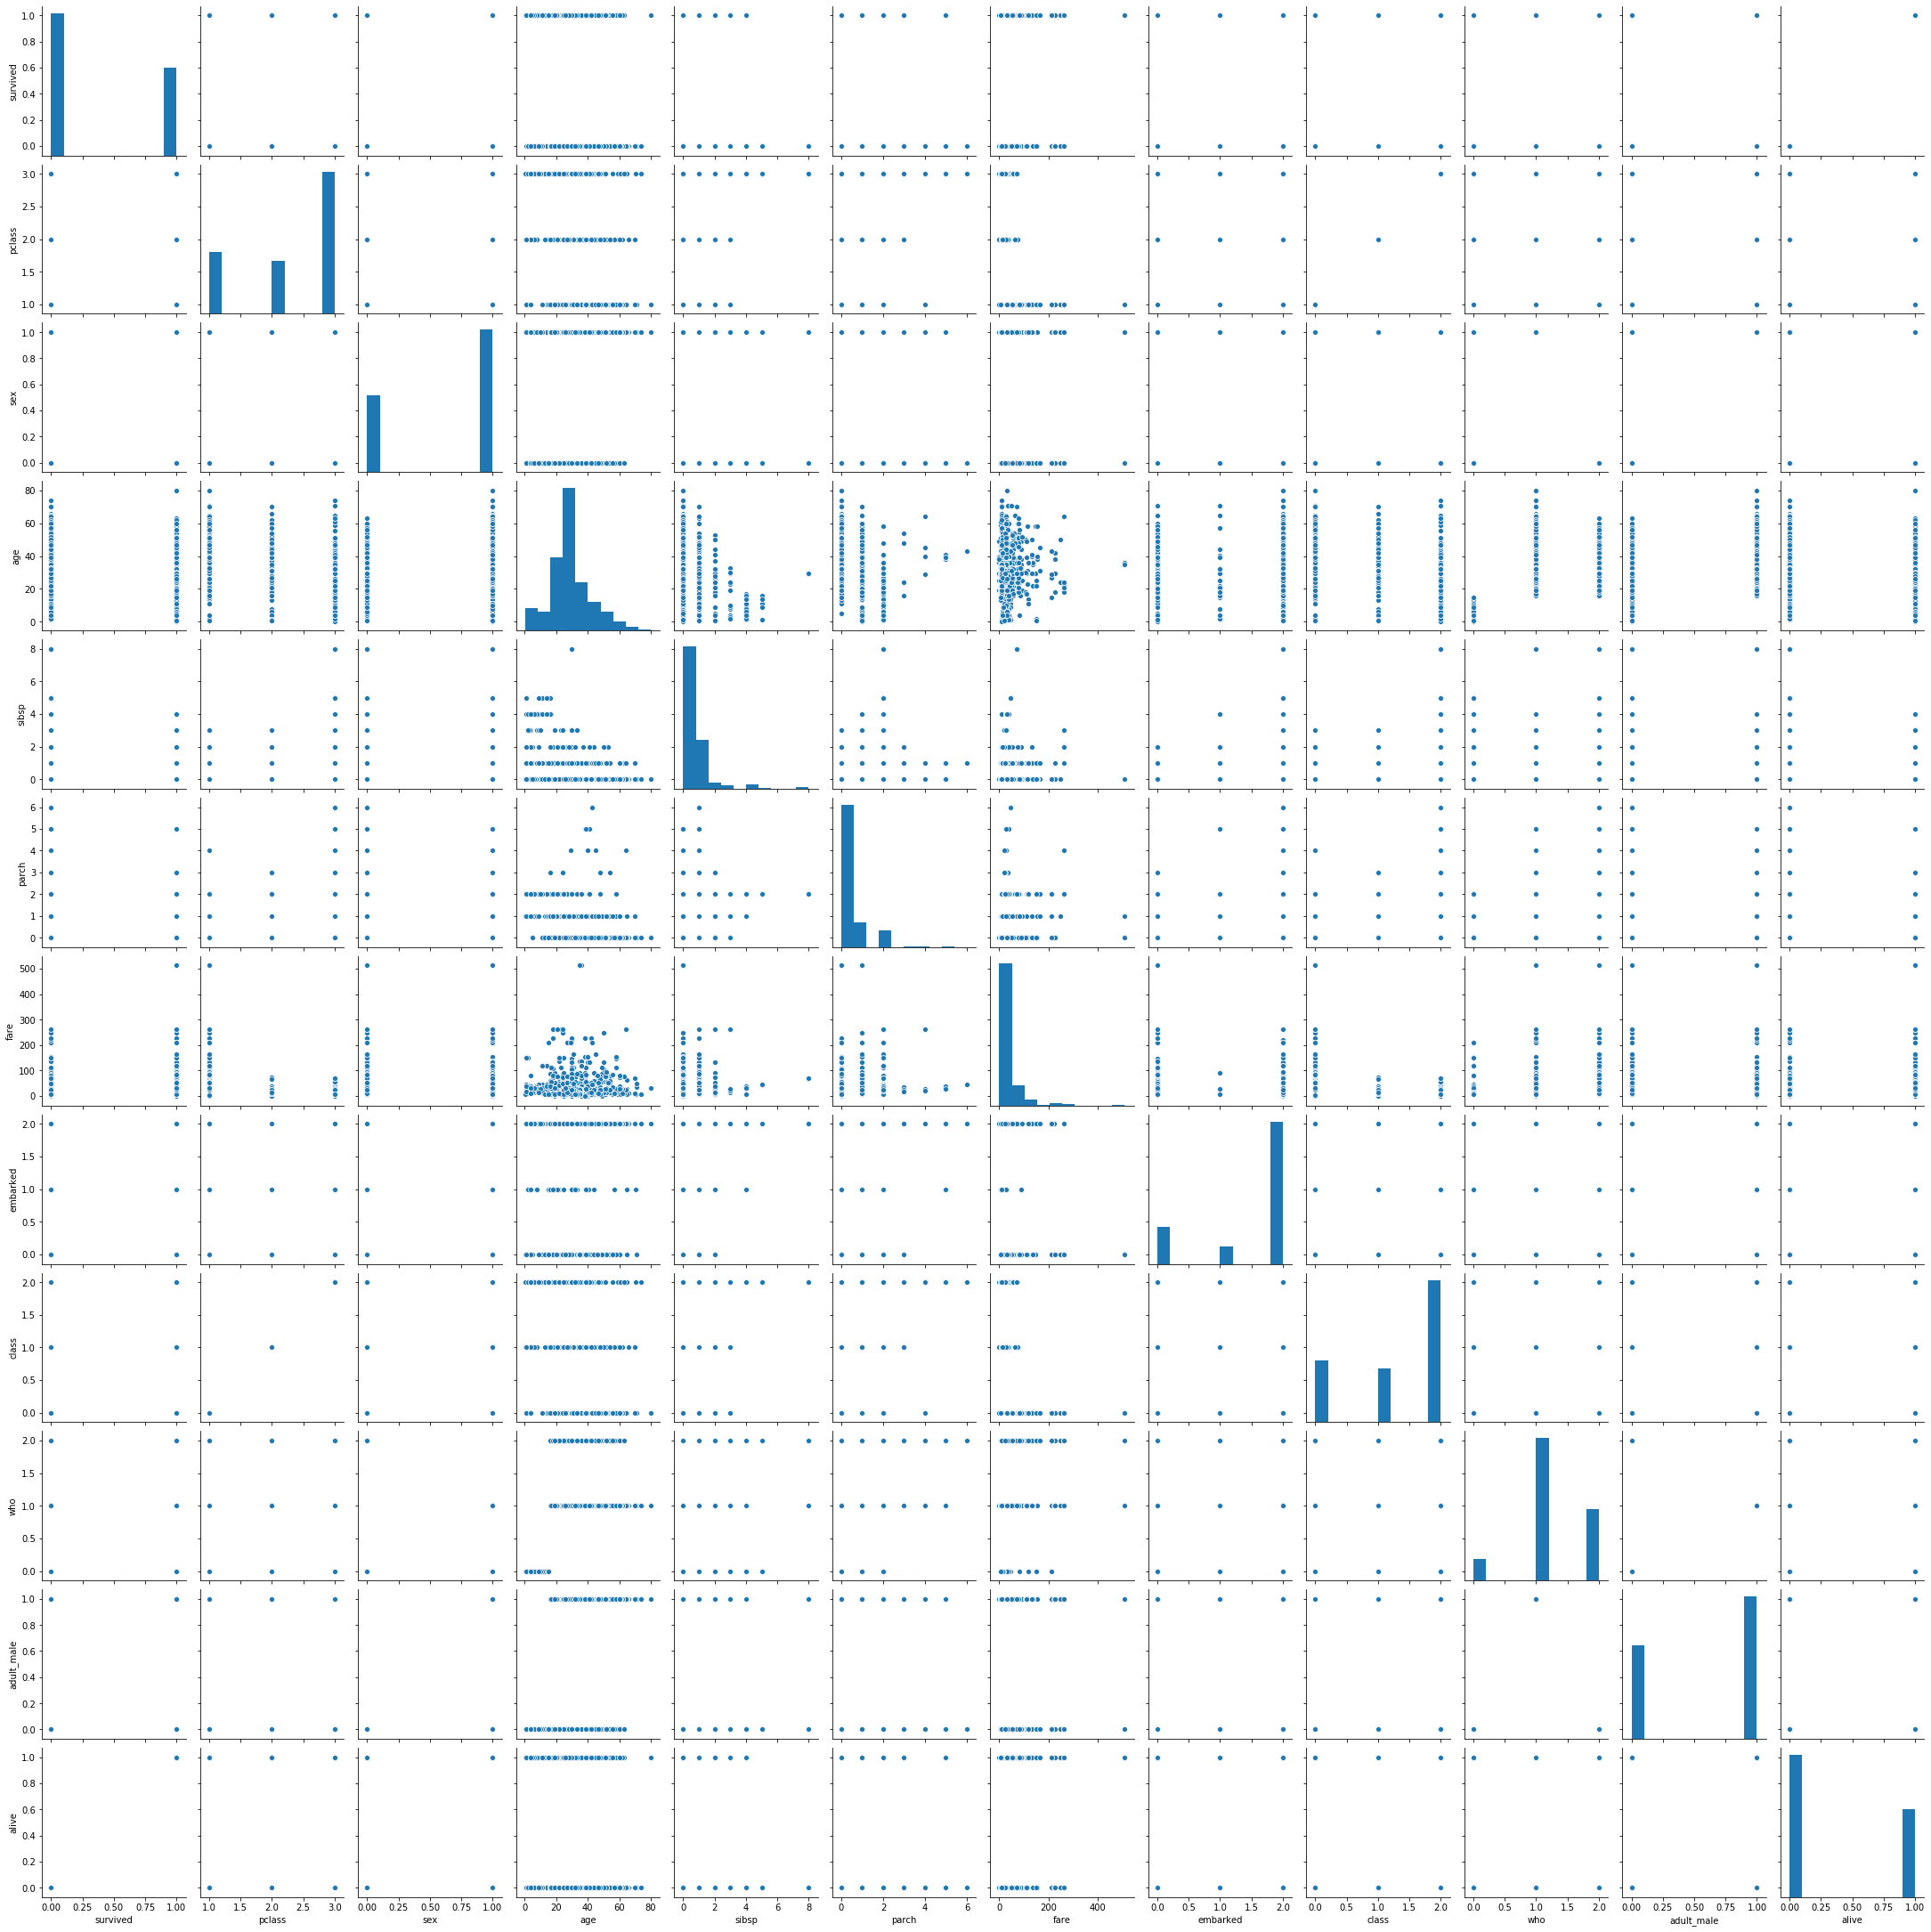

In [186]:
sns.pairplot(titanicdata1)

survived         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
pclass        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
sex           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
age           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
sibsp         AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
parch         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
fare          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
embarked            AxesSubplot(0.125,0.125;0.0945122x0.343182)
class            AxesSubplot(0.238415,0.125;0.0945122x0.343182)
who              AxesSubplot(0.351829,0.125;0.0945122x0.343182)
adult_male       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
alive            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

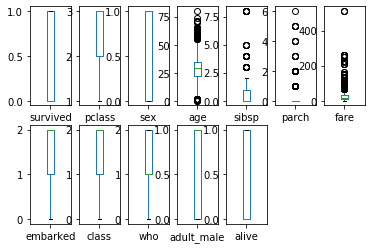

In [187]:
titanicdata1.plot(kind = 'box', subplots = True, layout =(2,7))

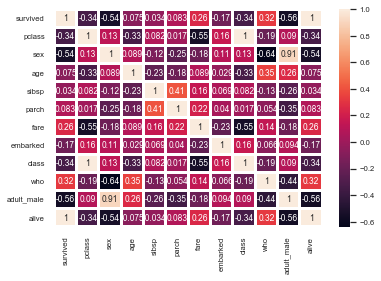

In [199]:
sns.set(font_scale = 0.7)

sns.heatmap(titanicdata1.corr(),annot = True,linewidths= 2)

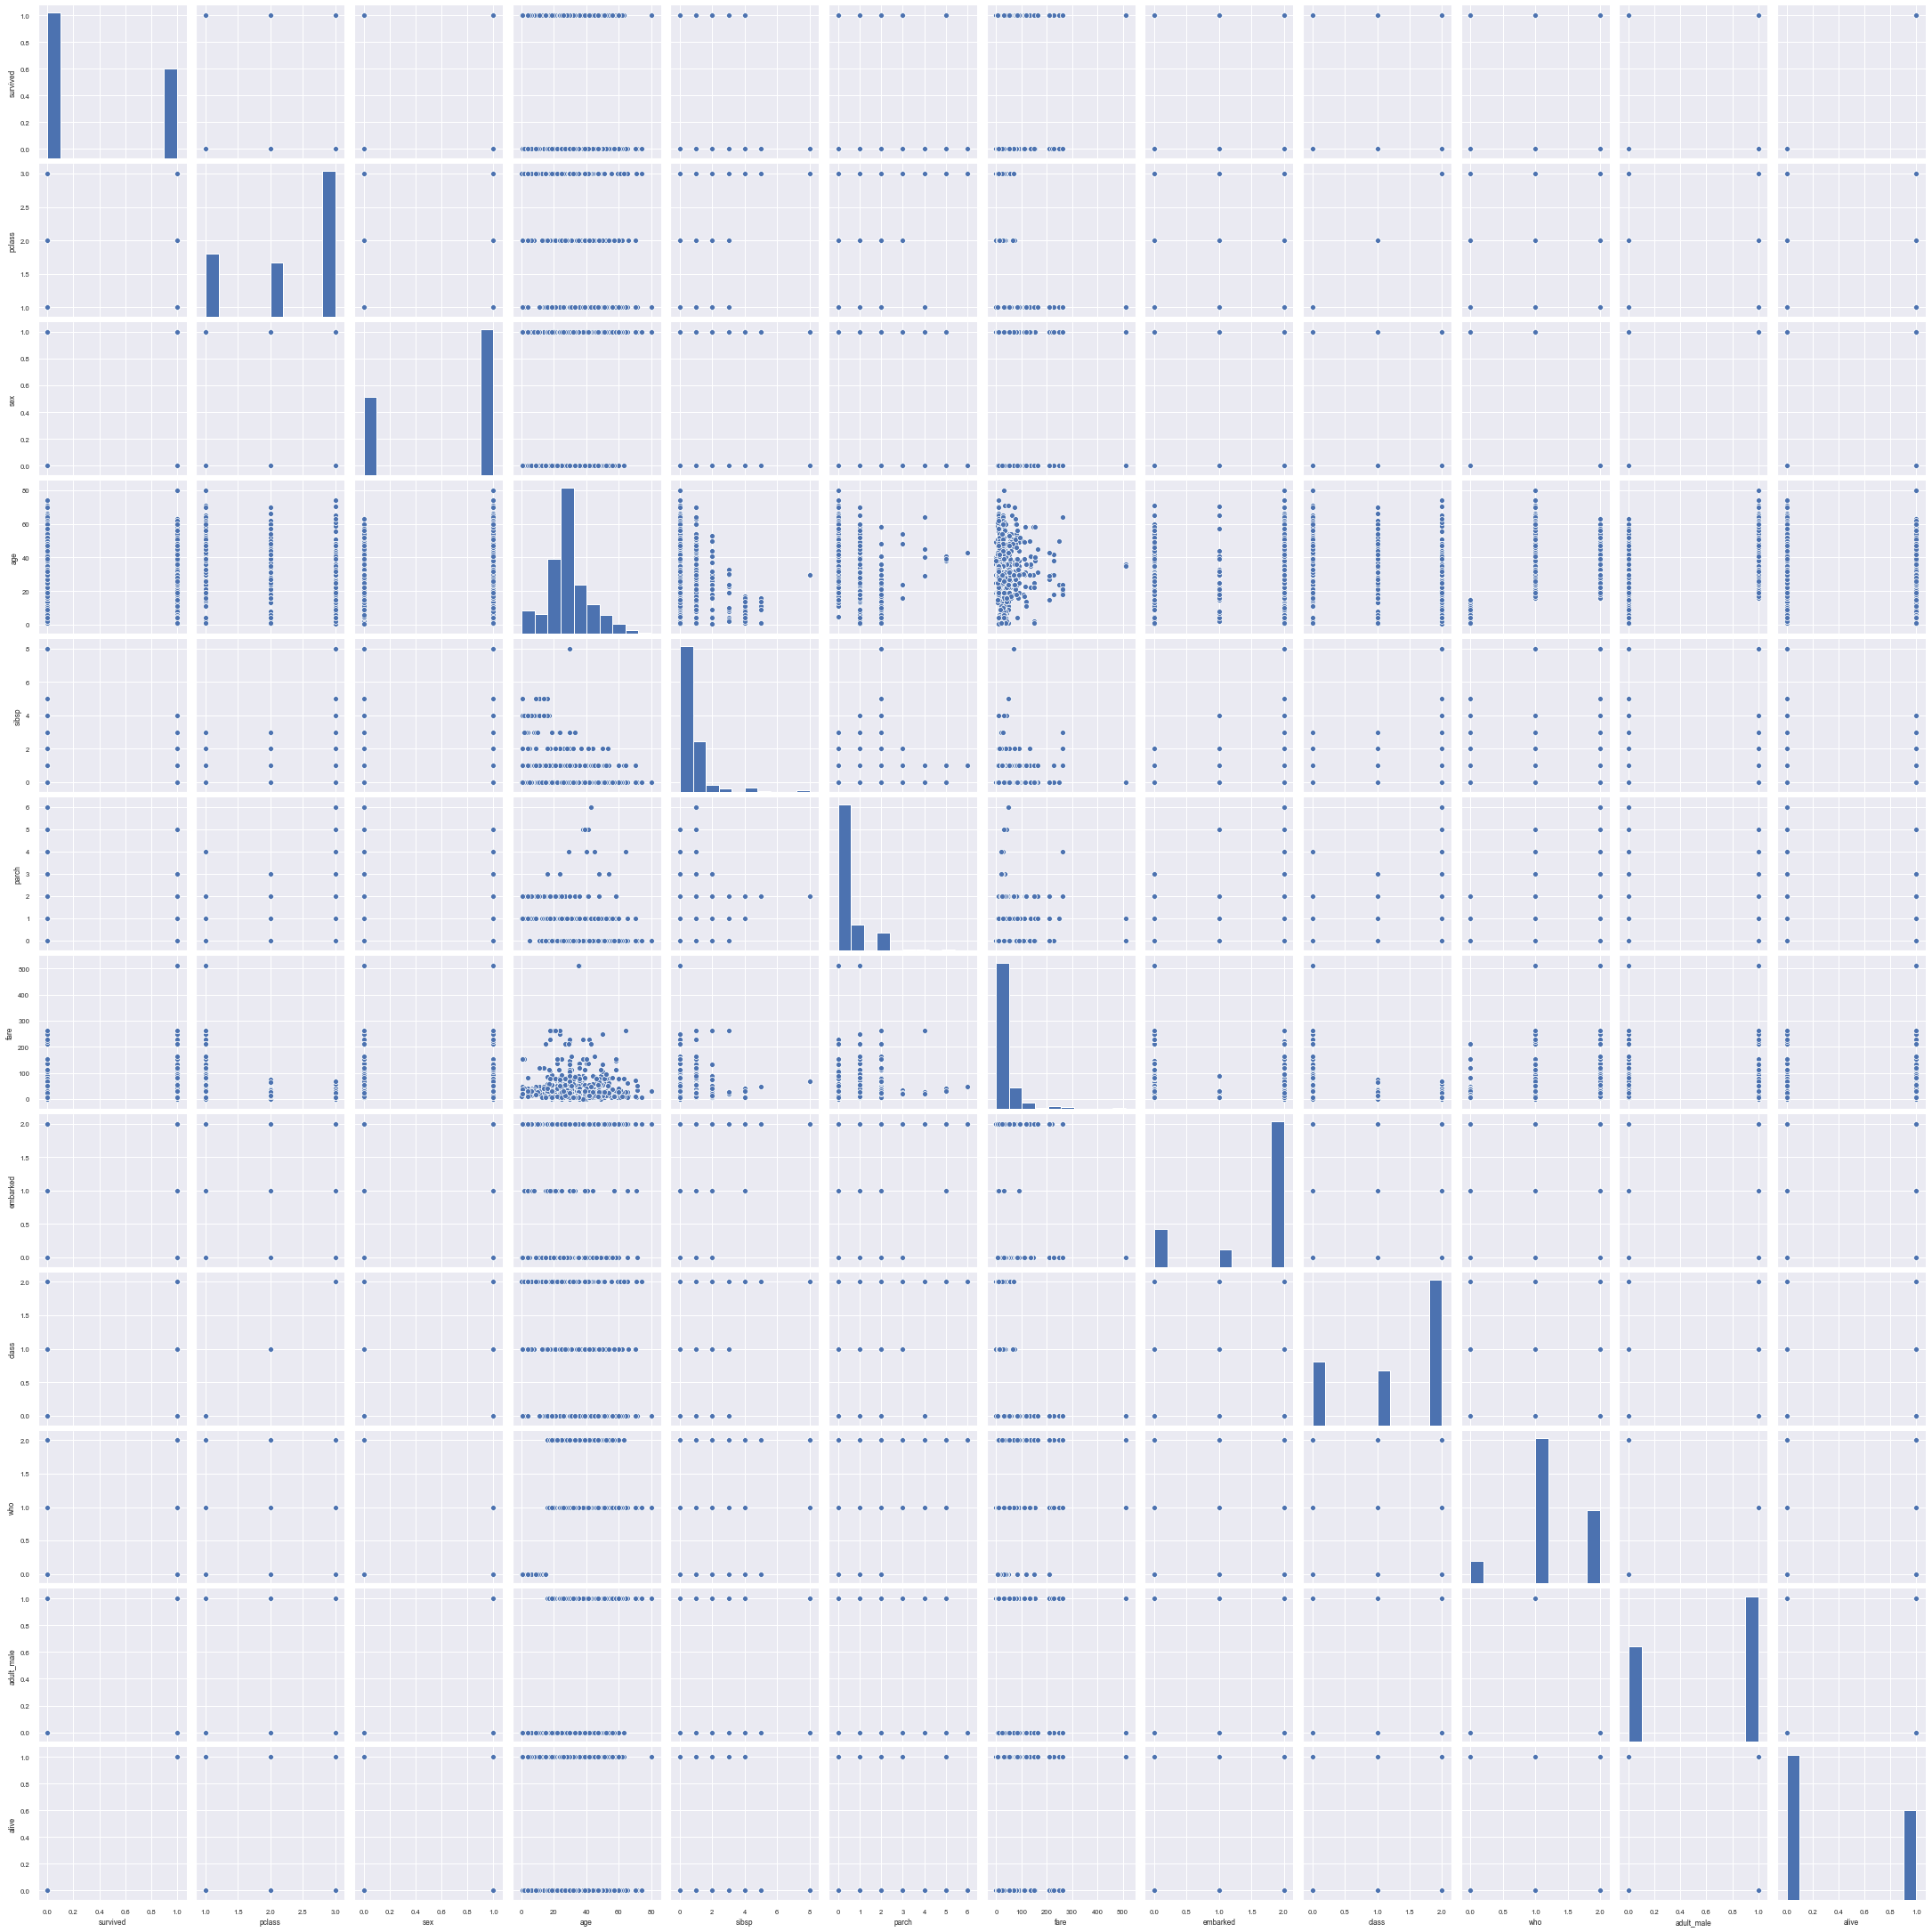

In [200]:
sns.pairplot(titanicdata1)

In [207]:
x = titanicdata1.iloc[:,1:]
print(x.head(10))

y = titanicdata1.iloc[:,0]
print(y)

   pclass  sex        age  sibsp  parch     fare  embarked  class  who  \
0       3    1  22.000000      1      0   7.2500         2      2    1   
1       1    0  38.000000      1      0  71.2833         0      0    2   
2       3    0  26.000000      0      0   7.9250         2      2    2   
3       1    0  35.000000      1      0  53.1000         2      0    2   
4       3    1  35.000000      0      0   8.0500         2      2    1   
5       3    1  29.642093      0      0   8.4583         1      2    1   
6       1    1  54.000000      0      0  51.8625         2      0    1   
7       3    1   2.000000      3      1  21.0750         2      2    0   
8       3    0  27.000000      0      2  11.1333         2      2    2   
9       2    0  14.000000      1      0  30.0708         0      1    0   

   adult_male  alive  
0           1      0  
1           0      1  
2           0      1  
3           0      1  
4           1      0  
5           1      0  
6           1      0  
7

In [209]:
###splititing the data

#for rstate in range(42,101):

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 42,stratify = y)

   # rfc = RandomForestClassifier()      ###multiclass--->i.e;we use multinomial else used guassian
    #rfc.fit(x_train,y_train)
    #predrfc = rfc.predict(x_test)
    #print('accuracy score is',rstate,"    ",accuracy_score(y_test,predrfc))
#print(confusion_matrix(y_test,predrfc))
#print(classification_report(y_test,predrfc))

In [211]:

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(622, 11) (267, 11) (622,) (267,)


In [214]:
knn = KNeighborsClassifier(n_neighbors=6)
sv =SVC()
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state = 6)
gnb = GaussianNB()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


In [215]:
models = []
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('LogisticRegression', lr))
models.append(('DecisionTreeClassifier', dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))
models.append(('GradientBosstingClassifier',gb))

"""""""""""""""""""""""""" KNeighborsClassifier """""""""""""""""""""""""""""


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.7228464419475655


cross_val_score= 0.7682967313585292


roc_auc_score= 0.6803030303030304


classification_report
               precision    recall  f1-score   support

           0       0.74      0.86      0.79       165
           1       0.69      0.50      0.58       102

    accuracy                           0.72       267
   macro avg       0.71      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267



[[142  23]
 [ 51  51]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



"""""""""""""""""""""""""" SVC """""""""""""""""""""""""""""


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',

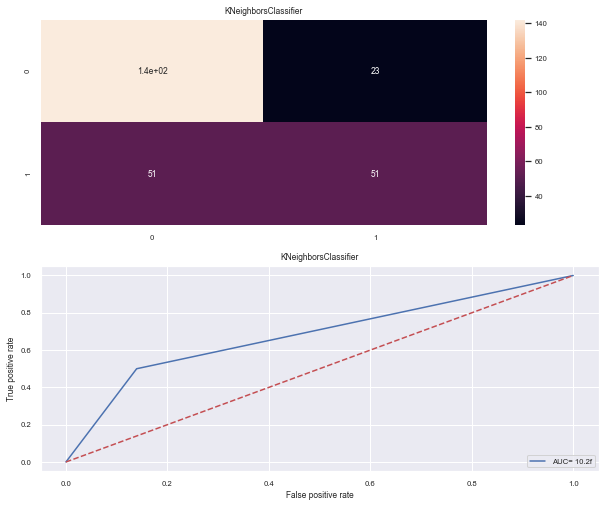

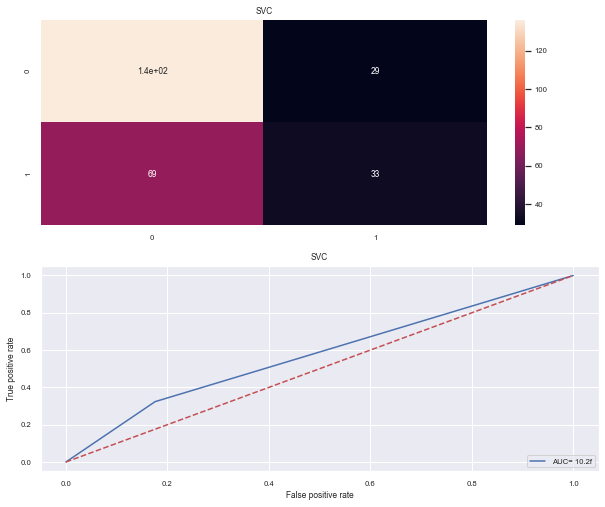

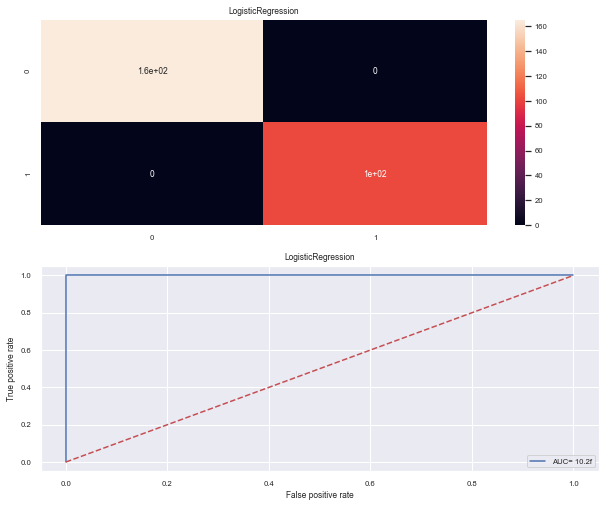

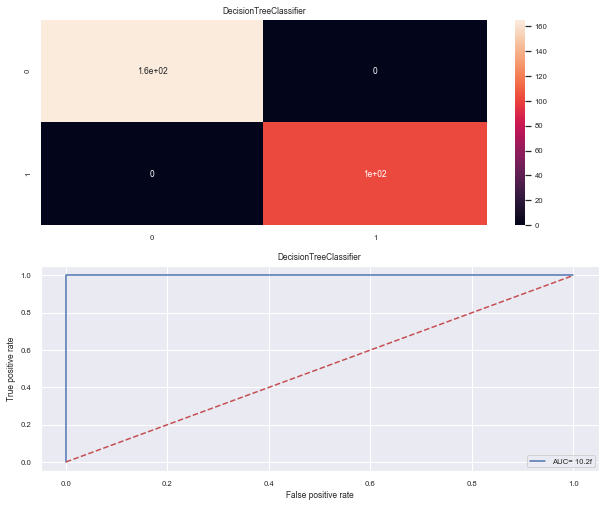

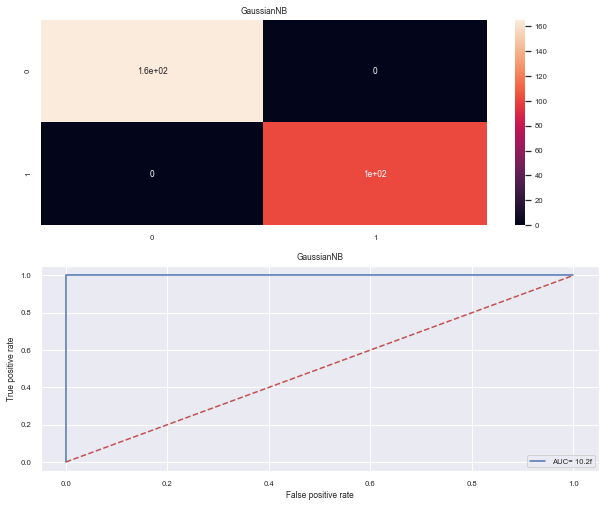

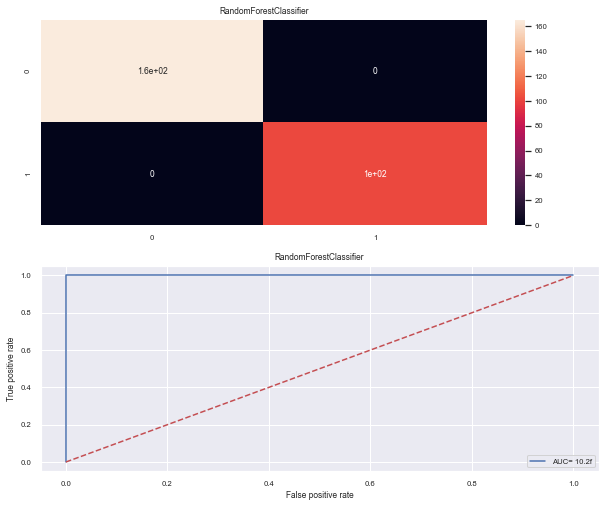

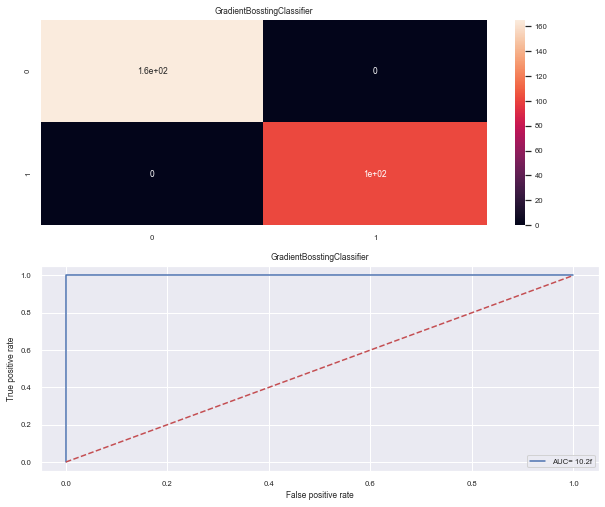

In [221]:
Model = []
score =[]
cvs = []
rocscore = []
for name,model in models:
    print ('""""""""""""""""""""""""""',name,'"""""""""""""""""""""""""""""')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring = 'accuracy').mean()
    
    print('cross_val_score=',sc)
    cvs.append(sc*100)
    
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    
    roc_auc = auc(false_positive_rate,true_positive_rate)
    
    print('roc_auc_score=',roc_auc)
    
    rocscore.append(roc_auc*100)
    
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    
    print('\n')
    
    cm = confusion_matrix(y_test,pre)
    
    print(cm)
    
    print('\n')
    
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    
    plt.title(name)
    
    print(sns.heatmap(cm,annot = True))
    
    plt.subplot(912)
    
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = 'AUC= 10.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    
    plt.legend(loc= 'lower right')
    plt.ylabel('True positive rate')
    
    plt.xlabel('False positive rate')
    
    print('\n\n')
    
    
    
    

In [222]:
result = pd.DataFrame({'Model': Model,'Accuracy Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,72.284644,76.829673,68.030303
1,SVC,63.295880,68.728294,57.388592
2,LogisticRegression,100.000000,100.000000,100.000000
3,DecisionTreeClassifier,100.000000,100.000000,100.000000
4,GaussianNB,100.000000,100.000000,100.000000
5,RandomForestClassifier,100.000000,100.000000,100.000000
6,GradientBosstingClassifier,100.000000,100.000000,100.000000


In [223]:
from sklearn.externals import joblib
joblib.dump(lr,'titanicdata1datasetauthentication.csv')


['titanicdata1datasetauthentication.csv']

In [224]:
model=joblib.load('titanicdata1datasetauthentication.csv')

model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1], dtype=int64)